In [2]:
#import commonfunctions as cf # this a custom module found the commonfunctions.py
import skimage.io as io
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray, gray2rgb
from skimage import filters, morphology, measure, feature
from skimage.transform import probabilistic_hough_line, rotate
from skimage.draw import ellipse_perimeter

# Show the matlpotlib figures inside the notebook
%matplotlib inline

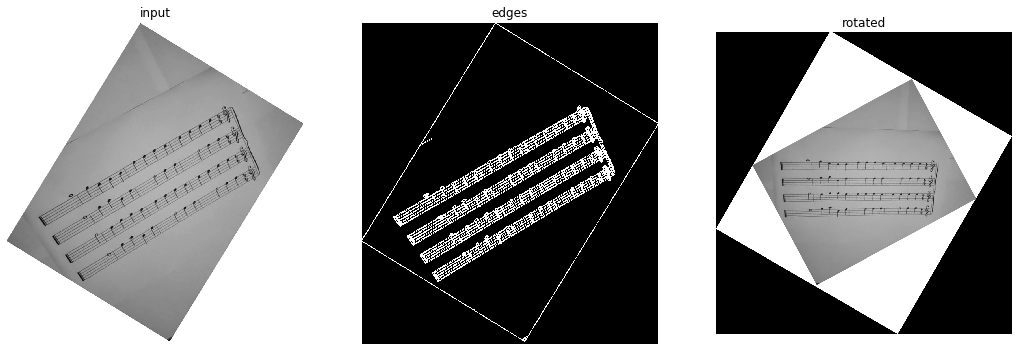

In [45]:
img = io.imread("Capture.JPG", as_gray=True)
edges = filters.sobel(img)

low = 0.05
high = 0.2
lowt = (edges > low).astype(int)
hight = (edges > high).astype(int)
edges = filters.apply_hysteresis_threshold(edges, low, high)

lines = probabilistic_hough_line(edges)
slopes = [(y2 - y1)/(x2 - x1) if (x2-x1) else 0 for (x1,y1), (x2, y2) in lines]
deg_angles = [np.degrees(np.arctan(x)) for x in slopes]

histo = np.histogram(deg_angles, bins=180)
# most frequent slope of all lines
rotation_number = histo[1][np.argmax(histo[0])]

rotated = rotate(img, rotation_number, resize=True)
cf.show_images([img, edges, rotated], ["input", "edges", "rotated"])

In [46]:
# def drawShape(img, coordinates, color):
#     # In order to draw our line in red
#     img = gray2rgb(img)

#     # Make sure the coordinates are expressed as integers
#     coordinates = coordinates.astype(int)

#     img[coordinates[:, 0], coordinates[:, 1]] = color

#     return img

# img = io.imread("Capture.JPG", as_gray=True)
# edges = filters.sobel(img)
# low = 0.05
# high = 0.2
# lowt = (edges > low).astype(int)
# hight = (edges > high).astype(int)
# hyst = filters.apply_hysteresis_threshold(edges, low, high)
# # cf.show_images([gray2rgb(hyst.astype('uint8'))])
# closed = morphology.closing(hyst)
# # closed = closed.astype('uint8') * 255

# # contours = measure.find_contours(img, 0.8)
# # for contour in contours:
# #     closed = drawShape(closed, contour, [255, 0, 0]) 

# # cf.show_images([img, edges, hyst, gray2rgb(closed)])
# cf.show_images([img, edges, hyst, closed])

In [47]:
# img = io.imread("Capture.JPG", as_gray=True)
# thresh = img > filters.threshold_otsu(img)
# edges = feature.canny(filters.gaussian(thresh, 3))
# lines = probabilistic_hough_line(edges)
# slopes = [(y2 - y1)/(x2 - x1) if (x2-x1) else 0 for (x1,y1), (x2, y2) in lines]
# rad_angles = [np.arctan(x) for x in slopes]
# deg_angles = [np.degrees(x) for x in rad_angles]
# histo = np.histogram(deg_angles, bins=180)
# rotation_number = histo[1][np.argmax(histo[0])]
# # print(rotation_number)
# # if rotation_number > 45:
# #     rotation_number = -(90-rotation_number)
# # elif rotation_number < -45:
# #     rotation_number = 90 - abs(rotation_number)
# rotated = rotate(img, rotation_number, resize=True)
# cf.show_images([thresh, edges, rotated])